## Applicant Tracking System Analysis using Thinknum Job Posting Database
This project aims to analyse the usage and popularity of various applicant tracking systems using the dataset collected by tracking the individual job postings on corporate websites. I try to answer two questions for a preliminary proof of concept analysis of ATS systems using this dataset
1. What are the most popoular ATS systems? 
2. Does region have an impact on the popularity of ATS systems?

Further, we can do exploratory analysis on how the trend has been over the years, what kind of corporations use own job protals vs third party ATS systems, how many and what type of job openings are posted on each kind of ATS portal and more...

In [5]:
import pandas as pd
df = pd.read_csv('./temp_datalab_records_job_listings.csv',  chunksize=10000000)
# dataset is 24G in size. Create a dataframe chunk of 10 million records
for df_chunk in df:
    poc_df = df_chunk
    break

In [6]:
poc_df.head()

,dataset_id,listing_id,domain,as_of_date,title,url,brand,category,locality,region,...,date_added,date_updated,posted_date,location_string,description,entity_id,city_lat,city_lng,cusip,isin
0,57644,https://careers-asburyauto.icims.com/jobs/1538...,careers-asburyauto.icims.com,2018-05-01,Automotive Technician Coggin Honda St. Augustine,https://careers-asburyauto.icims.com/jobs/1538...,Asbury Automotive Group,NaN,St. Augustine,FL,...,2018-05-01 02:15:18.856241+00,2018-05-01 02:15:18.856256+00,2018-04-12,"St. Augustine, FL, US",NaN,NaN,NaN,NaN,NaN,NaN
1,2334936,http://jobs.jcp.com/jobs/2540326-window-commis...,jobs.jcp.com,2018-05-01,Window Commission Associate - Pheasant Lane Mall,http://jobs.jcp.com/jobs/2540326-window-commis...,NaN,NaN,Nashua,New Hampshire,...,2018-05-01 16:18:00.864272+00,2018-05-01 16:18:00.864287+00,NaN,"NH-Nashua-Nashua, NH",NaN,NaN,NaN,NaN,NaN,NaN
2,57644,https://careers-asburyauto.icims.com/jobs/1486...,careers-asburyauto.icims.com,2018-05-01,Part Time Receptionist / Nights and Weekends /...,https://careers-asburyauto.icims.com/jobs/1486...,Asbury Automotive Group,NaN,Atlanta,GA,...,2018-05-01 02:15:18.85616+00,2018-05-01 02:15:18.856179+00,2018-03-05,"Atlanta, GA, US",NaN,NaN,NaN,NaN,NaN,NaN
3,2335348,https://sci.jobs/york-pa/maintenance-worker/13...,sci.jobs,2018-05-01,Maintenance Worker,https://sci.jobs/york-pa/maintenance-worker/13...,NaN,NaN,York,Pennsylvania,...,2018-05-01 23:19:01.421894+00,2018-05-01 23:19:01.421909+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57644,https://careers-asburyauto.icims.com/jobs/1542...,careers-asburyauto.icims.com,2018-05-01,Service Technician & Used Technician McDavid P...,https://careers-asburyauto.icims.com/jobs/1542...,Asbury Automotive Group,NaN,Plano,TX,...,2018-05-01 02:15:18.85602+00,2018-05-01 02:15:18.856035+00,2018-04-16,"Plano, TX, US",NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Create an 'ATS System' column in the data frame by extracting it from the 'domain' name column 
poc_df['ATS System'] = poc_df['domain'].str.split('.').str[-2]
poc_df.head()

,dataset_id,listing_id,domain,as_of_date,title,url,brand,category,locality,region,...,date_updated,posted_date,location_string,description,entity_id,city_lat,city_lng,cusip,isin,ATS System
0,57644,https://careers-asburyauto.icims.com/jobs/1538...,careers-asburyauto.icims.com,2018-05-01,Automotive Technician Coggin Honda St. Augustine,https://careers-asburyauto.icims.com/jobs/1538...,Asbury Automotive Group,NaN,St. Augustine,FL,...,2018-05-01 02:15:18.856256+00,2018-04-12,"St. Augustine, FL, US",NaN,NaN,NaN,NaN,NaN,NaN,icims
1,2334936,http://jobs.jcp.com/jobs/2540326-window-commis...,jobs.jcp.com,2018-05-01,Window Commission Associate - Pheasant Lane Mall,http://jobs.jcp.com/jobs/2540326-window-commis...,NaN,NaN,Nashua,New Hampshire,...,2018-05-01 16:18:00.864287+00,NaN,"NH-Nashua-Nashua, NH",NaN,NaN,NaN,NaN,NaN,NaN,jcp
2,57644,https://careers-asburyauto.icims.com/jobs/1486...,careers-asburyauto.icims.com,2018-05-01,Part Time Receptionist / Nights and Weekends /...,https://careers-asburyauto.icims.com/jobs/1486...,Asbury Automotive Group,NaN,Atlanta,GA,...,2018-05-01 02:15:18.856179+00,2018-03-05,"Atlanta, GA, US",NaN,NaN,NaN,NaN,NaN,NaN,icims
3,2335348,https://sci.jobs/york-pa/maintenance-worker/13...,sci.jobs,2018-05-01,Maintenance Worker,https://sci.jobs/york-pa/maintenance-worker/13...,NaN,NaN,York,Pennsylvania,...,2018-05-01 23:19:01.421909+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sci
4,57644,https://careers-asburyauto.icims.com/jobs/1542...,careers-asburyauto.icims.com,2018-05-01,Service Technician & Used Technician McDavid P...,https://careers-asburyauto.icims.com/jobs/1542...,Asbury Automotive Group,NaN,Plano,TX,...,2018-05-01 02:15:18.856035+00,2018-04-16,"Plano, TX, US",NaN,NaN,NaN,NaN,NaN,NaN,icims


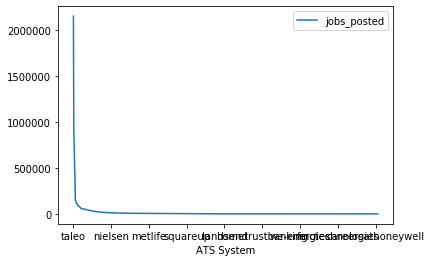

In [26]:
# get the ATS system usage statistics
ATS_df = poc_df.groupby('ATS System').size().reset_index(name='jobs_posted')
ATS_df = ATS_df.sort_values(by='jobs_posted', ascending=False)
ATS_df.plot(x='ATS System', y='jobs_posted')



The image shows the plot of the various ATS systems including corporations own portal on x-asis vs the number of jobs posted on that portal. 

As we can expect a large share of these are held by the top few ATS portals and the rest are shared by corporations own portals


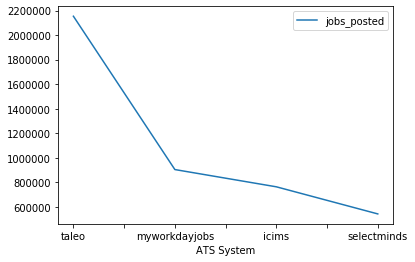

In [28]:
# get top 4 ATS portals
top_ATS_df = ATS_df.nlargest(4,'jobs_posted')
top_ATS_df.plot(x='ATS System', y='jobs_posted')




The image shows plot of the top 4 ATS systems on the x-asis VS the number of jobs posted on that portal. 

From this we can conclude that Taleo leads the market by a fair margin over the other 3 major ATS systems in market. But does this hold if we zoom in to a region and analyse. Let us see if this market share holds in the US and in India.

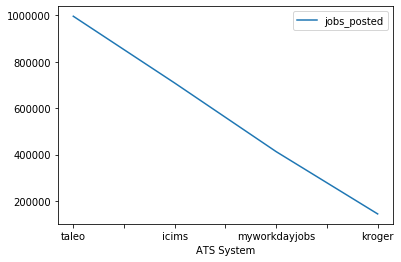

In [29]:
Country_ATS_df = poc_df.groupby(['country','ATS System']).size().reset_index(name='jobs_posted')
Country_ATS_df = Country_ATS_df[Country_ATS_df['country']=='USA']

top_Country_ATS_df = Country_ATS_df.nlargest(4,'jobs_posted')
top_Country_ATS_df.plot(x='ATS System', y='jobs_posted')


The image shows plot of the top 4 ATS systems on the x-asis VS the number of jobs posted on that portal for the US location.

As we can see, although the trend seemed to remain the same, they differ similarly in the number of jobs posted from one to the next as opposed to the worldwide market where Taleo clearly leads by a big margin

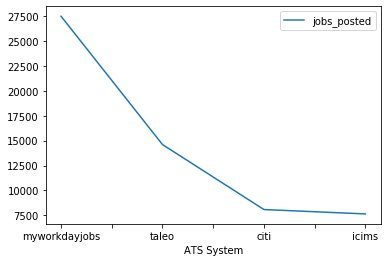

In [30]:
Country_ATS_df = poc_df.groupby(['country','ATS System']).size().reset_index(name='jobs_posted')
Country_ATS_df = Country_ATS_df[Country_ATS_df['country']=='IND']

top_Country_ATS_df = Country_ATS_df.nlargest(4,'jobs_posted')
top_Country_ATS_df.plot(x='ATS System', y='jobs_posted')


The image shows plot of the top 4 ATS systems on the x-asis VS the number of jobs posted on that portal for the India location.

Here Myworkdayjobs takes the major chunck of the market share. We can also note that Taleo, Myworkdayjobs and iCMS are the most popular in all the 3 graphs.